# Anomalies in RU2020 vote: Benford's law

https://en.wikipedia.org/wiki/Benford%27s_law

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('cleaned.csv')
df['turnout'] = df['given']/np.maximum(1, df['nominal'])
df['support'] = df['yes']/np.maximum(1, df['given'])

In [5]:
# Noisificator from a diff notebook, not yet functional

def noisify(df1):
    nexp = 1
    sigma = 0.005 # Noisification coefficient
    temp = df1.copy()
    temp['given'] = np.round(temp['nominal']*(temp['turnout']+np.random.normal(size=len(temp))*sigma))
    temp['given'] = np.maximum(0, np.minimum(temp['nominal'], temp['given'])).astype(int)
    temp['yes'] = np.round(temp['given']*(temp['turnout']+np.random.normal(size=len(temp))*sigma))
    temp['yes'] = np.maximum(0, np.minimum(temp['given'], temp['yes'])).astype(int)
    temp['turnout'] = temp.given / temp.nominal
    temp['support'] = temp.yes / temp.given
    return temp

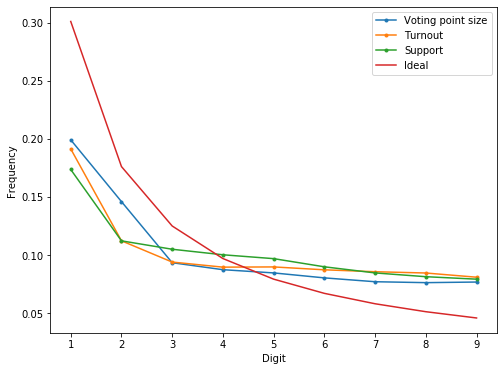

In [62]:
def digihist(s):
    """Histogram of digits"""
    h = {i:0 for i in range(10)}
    for i in s[:]:
        if i in '1234567890':
            h[int(i)] += 1
    return h
    
def plot_dict(h):
    """Now plot it"""
    x,y = zip(*[(key,val) for key,val in h.items()])
    y = np.array(y)/np.sum(y)
    plt.plot(x[1:], y[1:], '.-')
    
plt.figure(figsize=(8,6))
plot_dict(digihist(''.join([str(v) for v in df.nominal.values])))
plot_dict(digihist(''.join([str(v) for v in df.given.values])))
plot_dict(digihist(''.join([str(v) for v in df.yes.values])))
plt.plot(np.arange(1,10), np.log(1+1/np.arange(1,10))/np.log(10));
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.legend(labels=['Voting point size', 'Turnout', 'Support', 'Ideal']);